# Merge composition and property data from SciGlass

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
# Load libraries

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

for p in [pd, np, sns]:
    print (p.__name__, p.__version__)

pandas 1.3.1
numpy 1.21.1
seaborn 0.11.1


## Import composition data in mol%

In [47]:
df_sg_comp_mol = pd.read_csv('data_SciGlass/SciGlass_comp_mol.csv')
print(df_sg_comp_mol.shape)
df_sg_comp_mol.head()

(422879, 728)


,Kod,GlasNo,Unnamed: 2,(NH4)2SO4,(NH4)3PO4,Ag,Ag2CO3,Ag2MoO4,Ag2O,Ag2S,Ag2SO4,Ag2Se,Ag2Se5,Ag2Te,Ag4SSe,AgAsS2,AgBr,AgCl,AgF,AgGaS2,AgI,AgNO3,AgPO3,Al,Al(PO3)3,...,Yb2O3,Yb2S3,YbCl3,YbF3,YbO2,YbSe,Zn,Zn(PO3)2,Zn3(PO4)2,Zn3As2,ZnBr2,ZnCl2,ZnF2,ZnI2,ZnO,ZnS,ZnSO4,ZnSe,ZnTe,Zr,ZrF4,ZrO2,ZrS2,ZrSe2,ZrSiO4
0,204,20000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
1,205,20001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.31,0.0,0.0,0.0
2,205,20002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.30,0.0,0.0,0.0
3,205,20003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.95,0.0,0.0,0.0
4,205,20004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.59,0.0,0.0,0.0


In [48]:
# Determine compositions to use: in this case, 'SiO2', 'B2O3', 'Al2O3', 'MgO', 'CaO', 'Na2O', 'K2O'

comp_list = ['Kod', 'GlasNo', 'SiO2', 'B2O3', 'Al2O3', 'MgO', 'CaO', 'Na2O', 'K2O']

In [49]:
# Check the compositions to use

example_problem_comp = df_sg_comp_mol[comp_list]
print(example_problem_comp.shape)
example_problem_comp.head()

(422879, 9)


,Kod,GlasNo,SiO2,B2O3,Al2O3,MgO,CaO,Na2O,K2O
0,204,20000,100.00,0.0,0.0,0.0,0.0,0.00,0.0
1,205,20001,45.35,0.0,0.0,0.0,0.0,33.99,0.0
2,205,20002,39.99,0.0,0.0,0.0,0.0,33.40,0.0
3,205,20003,48.64,0.0,0.0,0.0,0.0,31.43,0.0
4,205,20004,48.24,0.0,0.0,0.0,0.0,30.60,0.0


In [50]:
# Check the data type

print(example_problem_comp['Kod'].dtype)
print(example_problem_comp['GlasNo'].dtype)
print(example_problem_comp['SiO2'].dtype)
print(example_problem_comp['K2O'].dtype)

int64
int64
float64
float64


In [51]:
# Remove NaNs

example_problem_comp_1 = example_problem_comp.dropna()
print(example_problem_comp_1.shape)
example_problem_comp_1.head()

(422879, 9)


,Kod,GlasNo,SiO2,B2O3,Al2O3,MgO,CaO,Na2O,K2O
0,204,20000,100.00,0.0,0.0,0.0,0.0,0.00,0.0
1,205,20001,45.35,0.0,0.0,0.0,0.0,33.99,0.0
2,205,20002,39.99,0.0,0.0,0.0,0.0,33.40,0.0
3,205,20003,48.64,0.0,0.0,0.0,0.0,31.43,0.0
4,205,20004,48.24,0.0,0.0,0.0,0.0,30.60,0.0


In [52]:
# Get columns number of composition range

start = example_problem_comp_1.columns.get_loc('SiO2')
end   = example_problem_comp_1.columns.get_loc('K2O') + 1
print('start column = ', start)
print('end column   = ', end)

start column =  2
end column   =  9


In [53]:
#　Add the element total column

example_problem_comp_1['element_total'] = example_problem_comp_1.iloc[:, start:end].sum(axis = 1)
print(example_problem_comp_1.shape)
example_problem_comp_1.head()

(422879, 10)


,Kod,GlasNo,SiO2,B2O3,Al2O3,MgO,CaO,Na2O,K2O,element_total
0,204,20000,100.00,0.0,0.0,0.0,0.0,0.00,0.0,100.00
1,205,20001,45.35,0.0,0.0,0.0,0.0,33.99,0.0,79.34
2,205,20002,39.99,0.0,0.0,0.0,0.0,33.40,0.0,73.39
3,205,20003,48.64,0.0,0.0,0.0,0.0,31.43,0.0,80.07
4,205,20004,48.24,0.0,0.0,0.0,0.0,30.60,0.0,78.84


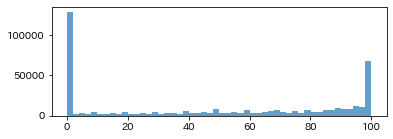

In [54]:
#　Check the distribution of element_total column

plt.figure(figsize = (6, 2))
plt.hist(example_problem_comp_1['element_total'], bins = 50, alpha = 0.7)
plt.show()

In [55]:
# Remove rows less than 95 mon% in total

example_problem_comp_1 = example_problem_comp_1[example_problem_comp_1['element_total'] >= 95.0]

print(example_problem_comp_1.shape)
pd.set_option('display.max_columns', 50)
example_problem_comp_1.head()

(86347, 10)


,Kod,GlasNo,SiO2,B2O3,Al2O3,MgO,CaO,Na2O,K2O,element_total
0,204,20000,100.00,0.0,0.00,0.00,0.00,0.00,0.000,100.000
6,206,20006,75.33,0.0,0.40,0.16,9.80,14.25,0.038,99.978
13,206,20013,69.47,0.0,3.47,0.00,10.54,15.13,1.210,99.820
15,206,20015,70.23,0.0,1.24,0.00,10.85,15.54,0.500,98.360
16,206,20016,72.38,0.0,0.84,0.00,10.42,15.66,0.280,99.580


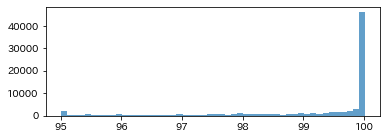

In [56]:
#　Check the distribution of element_total column

plt.figure(figsize = (6, 2))
plt.hist(example_problem_comp_1['element_total'], bins = 50, alpha = 0.7)
plt.show()

## Load property data from the "SciGK" file

In [57]:
# Load SciGK file

df_sg_prop = pd.read_csv('data_SciGlass/SciGK.csv', encoding = 'latin1')
print(df_sg_prop.shape)
df_sg_prop.head()

(422949, 186)


,KOD,GLASNO,A_WT,M_WT,SIO2,AL2O3,B2O3,CAO,K2O,NA2O,PBO,Li2O,MgO,SRO,BAO,ZNO,P2O5,GEO2,ZRO2,TIO2,TEO2,RO,FemOn,WSIO2,WAL2O3,...,wRmNn,wWO3,wRmOn,Author,Year,Glass_Class,Analysis,RO2,R2O5,RO3,RO4,WRO2,WR2O5,WRO3,WRO4,Prop_Code,GForm,any_n,Trademark,Tmax,Vmax,Tn,Io,tcr,tx
0,204,20000,20.02,60.08,100.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,100.00,0.0,...,0.0,0.0,100.0,Volarovich M.P.,1936,SiO2,b,0.00,0.00,0.0,NaN,0.00,0.00,0.0,NaN,400 400,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,205,20001,21.77,71.76,45.35,0.0,0.0,0.0,0.0,33.99,0.0,0.0,0.0,0.0,0.0,0.0,11.35,0.0,9.31,0.0,0.0,0.0,0.0,35.90,0.0,...,0.0,0.0,100.0,Hoj J.W.,1992,SiO2 R2O RO2 R2O5,b,9.31,11.35,0.0,NaN,15.11,21.22,0.0,NaN,130 420 700,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,205,20002,23.06,79.64,39.98,0.0,0.0,0.0,0.0,33.39,0.0,0.0,0.0,0.0,0.0,0.0,11.31,0.0,15.29,0.0,0.0,0.0,0.0,30.16,0.0,...,0.0,0.0,100.0,Hoj J.W.,1992,SiO2 R2O RO2 R2O5,b,15.29,11.31,0.0,NaN,23.66,20.17,0.0,NaN,130 420 700,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,205,20003,22.31,74.93,48.64,0.0,0.0,0.0,0.0,31.43,0.0,0.0,0.0,0.0,0.0,0.0,8.97,0.0,10.95,0.0,0.0,0.0,0.0,39.00,0.0,...,0.0,0.0,100.0,Hoj J.W.,1992,SiO2 R2O RO2 R2O5,b,10.95,8.97,0.0,NaN,18.00,16.99,0.0,NaN,130 420 700,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,205,20004,22.62,75.62,48.24,0.0,0.0,0.0,0.0,30.60,0.0,0.0,0.0,0.0,0.0,0.0,8.57,0.0,12.59,0.0,0.0,0.0,0.0,38.32,0.0,...,0.0,0.0,100.0,Hoj J.W.,1992,SiO2 R2O RO2 R2O5,b,12.59,8.57,0.0,NaN,20.51,16.08,0.0,NaN,130 420 700,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Determine properties to use with "Kod" and "GlasNo": in this case, modulus and density

prop_list = ['KOD', 'GLASNO', 'MOD_UNG', 'DENSITY']

# Column name of each property in the "SciGK" file <font color='red'>(presumed)</font>

Viscosity (log η = 1~13)<br>
'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13'

Viscosity (log η at 500~2200 degree C)<br>
'V500', 'V600', 'V700, 'V800', 'V900', 'V1000, 'V1100', 'V1200', 'V1300, 'V1400', 'V1500', 'V1600, 'V1800', 'V2000', 'V2200'

Heat property (Tg, Mg, Littleton Point, Annealing Point, Strain Point, Softening Point)<br>
'TG', 'Mg', 'LPT', 'ANPT', 'SPT', 'Tsoft'

log ρ at 20~1400 degree C<br>
'RO20', 'RO150', 'RO300', 'ro800', 'ro1000', 'ro1200', 'ro1400'

Density (Density at 20~1400 degree C)<br>
'DENSITY', 'dens800', 'dens1000', 'dens1200', 'dens1400'

Mechanical property (Young's modulus, shear modulus, Poisson's ratio, hardness)<br>
'MOD_UNG', 'MOD_SDV', 'pois', 'MIKROTV'

Thermal expansion (CTE)<br>
'TEC55', 'TEC100', 'TEC160', 'TEC210', 'TEC350', 'ANY_TEC'

Specific heat (Cp at 20~1400 degree C)<br>
'cp20', 'cp200', 'cp400', 'cp800', 'cp1000', 'cp1200', 'cp1400'

σ at T>Tg, σ at 900~1400 degree C<br>
'any_sut', 'SUT900', 'SUT1200', 'SUT1300', 'SUT1400'

Optical property (refractive index, Abbe number)<br>
'ND300', 'NUD300'

Electric property (dielectric constant, loss tangent)<br>
'EPS730', 'TGD730'


# <font color='red'>(Again, property names are presumed)</font>

In [59]:
# Get property data

example_problem_prop = df_sg_prop[prop_list]
print(example_problem_prop.shape)
example_problem_prop.head()

(422949, 4)


,KOD,GLASNO,MOD_UNG,DENSITY
0,204,20000,NaN,NaN
1,205,20001,NaN,NaN
2,205,20002,NaN,NaN
3,205,20003,NaN,NaN
4,205,20004,NaN,NaN


In [60]:
# Check data type

print(example_problem_prop['KOD'].dtype)
print(example_problem_prop['GLASNO'].dtype)
print(example_problem_prop['MOD_UNG'].dtype)
print(example_problem_prop['DENSITY'].dtype)

int64
int64
float64
float64


In [61]:
# Change the column name of "SciGK" to the same name of composition data, and fill zero to the NaN cell

example_problem_prop_1 = example_problem_prop.rename(columns={'KOD': 'Kod', 'GLASNO': 'GlasNo', 'DENSITY': 'density', 'MOD_UNG': 'E'})
example_problem_prop_1 = example_problem_prop_1.fillna(0.0)

print(example_problem_prop_1.shape)
example_problem_prop_1.head()

(422949, 4)


,Kod,GlasNo,E,density
0,204,20000,0.0,0.0
1,205,20001,0.0,0.0
2,205,20002,0.0,0.0
3,205,20003,0.0,0.0
4,205,20004,0.0,0.0


## Combine proprty data to the right of composition data

In [62]:
df_comp_prop = pd.merge(example_problem_comp_1, example_problem_prop_1, how = 'left', on = ['Kod', 'GlasNo'])
print(df_comp_prop.shape)
df_comp_prop.head()

(86353, 12)


,Kod,GlasNo,SiO2,B2O3,Al2O3,MgO,CaO,Na2O,K2O,element_total,E,density
0,204,20000,100.00,0.0,0.00,0.00,0.00,0.00,0.000,100.000,0.0,0.0
1,206,20006,75.33,0.0,0.40,0.16,9.80,14.25,0.038,99.978,0.0,0.0
2,206,20013,69.47,0.0,3.47,0.00,10.54,15.13,1.210,99.820,0.0,0.0
3,206,20015,70.23,0.0,1.24,0.00,10.85,15.54,0.500,98.360,0.0,0.0
4,206,20016,72.38,0.0,0.84,0.00,10.42,15.66,0.280,99.580,0.0,0.0


## Keep the data that both modulus and density are positive

In [63]:
df_comp_prop = df_comp_prop[(df_comp_prop['E'] > 0.0) & (df_comp_prop['density'] > 0.0)]

print(df_comp_prop.shape)
df_comp_prop.head()

(5078, 12)


,Kod,GlasNo,SiO2,B2O3,Al2O3,MgO,CaO,Na2O,K2O,element_total,E,density
363,257,20587,80.0,0.0,0.0,0.0,0.0,16.0,4.0,100.0,63.3,2.39
364,257,20588,72.7,0.0,0.0,0.0,0.0,23.6,3.7,100.0,62.5,2.45
365,257,20589,72.7,0.0,0.0,0.0,0.0,14.5,12.8,100.0,60.3,2.45
366,257,20591,81.8,0.0,0.0,0.0,0.0,14.5,3.7,100.0,62.9,2.41
367,257,20592,71.3,0.0,0.0,0.0,10.9,14.2,3.6,100.0,72.3,2.51


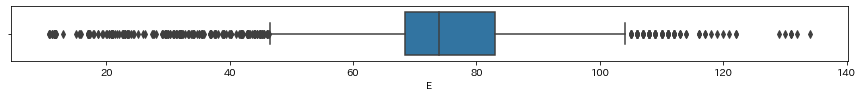

In [64]:
# Check distribution of modulus

plt.figure(figsize=(15, 1))
sns.boxplot(df_comp_prop['E'])
plt.show()

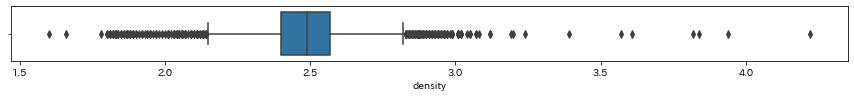

In [65]:
# Check distribution of density

plt.figure(figsize=(15, 1))
sns.boxplot(df_comp_prop['density'])
plt.show()

In [66]:
# Refresh the index, remove duplicates and element_total column

df_comp_prop_ridx = df_comp_prop.reset_index(drop = True)
df_comp_prop_ridx = df_comp_prop_ridx[~df_comp_prop_ridx.duplicated()]
df_comp_prop_ridx = df_comp_prop_ridx.drop(df_comp_prop_ridx.columns[[-3]], axis = 1)

print(df_comp_prop_ridx.shape)
df_comp_prop_ridx.head()

(5078, 11)


,Kod,GlasNo,SiO2,B2O3,Al2O3,MgO,CaO,Na2O,K2O,E,density
0,257,20587,80.0,0.0,0.0,0.0,0.0,16.0,4.0,63.3,2.39
1,257,20588,72.7,0.0,0.0,0.0,0.0,23.6,3.7,62.5,2.45
2,257,20589,72.7,0.0,0.0,0.0,0.0,14.5,12.8,60.3,2.45
3,257,20591,81.8,0.0,0.0,0.0,0.0,14.5,3.7,62.9,2.41
4,257,20592,71.3,0.0,0.0,0.0,10.9,14.2,3.6,72.3,2.51


In [67]:
# Save the file

df_comp_prop_ridx.to_csv('data_SciGlass/SciGlass_comp_prop.csv', index = None)